# <center>DATA BOOTCAMP</center>



# jupyter.databootcamp.com.br
# usuario = primeira parte do seu email
# senha = bootcamp

![alt text](https://www.phactual.com/wp-content/uploads/2014/12/tumblr_n56gr1v8cy1qgllp5o1_500.jpg)

# Estatística

## 1- Introdução e Probabilidade

### Em estatística tudo começa com PROBABILIDADE

Probabilidade é o estudo das chances de obtenção de cada resultado de um experimento aleatório.

## É de conhecimento geral que se jorgarmos uma moeda 50x ela vai cair 25x cara!
Como podemos provar isso?

In [1]:
import numpy as np #pacote numérico usado na maioria das aplicações python

In [2]:
minimo_inclusivo = 0
maximo_exclusivo = 2
total_de_resultados = 50

r = np.random.randint(minimo_inclusivo,
                      maximo_exclusivo,
                      total_de_resultados)
r
#esse cara retorna uma lista de Eventos com 50 valores 0 (coroa) e 1 (cara)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0])

In [3]:
sum(r)

21

** Esse resultado é de uma Distribuição Binomial. **

Pois existem apenas dois resultados, mutualmente exclusivos e as n tentativas são *independentes*.

Por ser uma distribuição binomial podemos calcular o número de jogadas com sucesso (1) apenas somando todos os valores

Um experimento aleatório pode ser repetido inúmeras vezes e nas mesmas condições e, mesmo assim, apresenta resultados diferentes. Cada um desses resultados possíveis é chamado de **ponto amostral**. 

In [4]:
minimo_inclusivo = 0
maximo_exclusivo = 2
total_de_resultados = 50

resultado = np.random.randint(minimo_inclusivo, maximo_exclusivo, total_de_resultados)
sum(resultado)

27

### Também podemos mostrar esse experimento de forma gráfica

In [5]:
%matplotlib inline 
#comando para dizer pro Jupyter exibir os gráficos
import seaborn as sns #pacote grafico que deixa as coisas mais bonitas :)

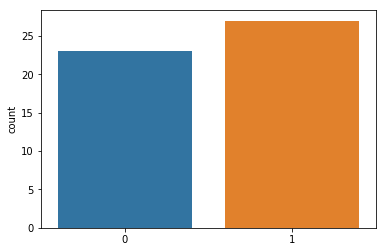

In [6]:
sns.countplot(resultado) #esse grafico pega os resultados e agrupa

### Isso que nós acabamos de fazer foi um experimento. Para diminuirmos a aleatoriedade devemos repetir esse experimento mais vezes

#### Primeiro vamos separar o código do sorteio em uma função

In [7]:
np.random.randint?

In [8]:
import numpy as np

def contador_de_caras():
    resultado_das_jogadas = np.random.randint(0,2,50)
    somador = sum(resultado_das_jogadas)
    return somador

In [9]:
contador_de_caras()

27

#### Agora vamos criar uma função que repita esse experimento e coloque o resultado em uma lista

In [10]:
def simulador_jogadas_de_moeda(qtd_de_experimentos):

    qtd_caras = []
    #esse for faz ele repetir o codigo dele o numero de vezes que passamos
    for repeticao in range(qtd_de_experimentos): 
        jogadas = contador_de_caras()
        #pega o resultado da soma e inclui na lista
        qtd_caras.append(jogadas) 
    
    return qtd_caras

In [11]:
simulador = simulador_jogadas_de_moeda(10)

In [12]:
simulador

[23, 25, 25, 25, 20, 29, 29, 33, 23, 25]

### Uma forma fácil de ver esse resultado é olhando os resultados de forma agrupada

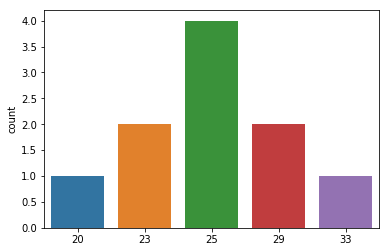

In [13]:
%matplotlib inline
sns.countplot(simulador)

## <font color='blue'>Como podemos aumentar a chance de cair 25? Faça :)</font>

![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

### Devemos chamar o simulador para mais jogadas/experimentos

In [14]:
total_jogadas = 9000
simulador = simulador_jogadas_de_moeda(total_jogadas)

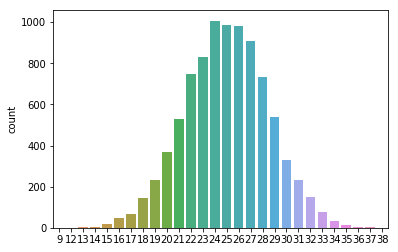

In [15]:
sns.countplot(simulador)

### Podemos usar o distplot que é uma junção do Histograma com o KDE

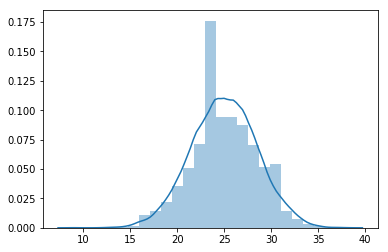

In [16]:
%matplotlib inline
sns.distplot(simulador, bins=25)

#### o distplot permite configurar o numero de agrupamentos, o padrão é 10

In [17]:
sns.distplot?

In [18]:
type(simulador)

list

In [19]:
import pandas
pandas.Series(simulador).describe()

count    9000.000000
mean       24.979889
std         3.493956
min         9.000000
25%        23.000000
50%        25.000000
75%        27.000000
max        38.000000
dtype: float64

## Distribuição normal em vídeo (Modelo de probabilidade do Museum of Science de Boston)

In [20]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/wUgQtXEodf0?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

## Qual a probabilidade de cair menos de 20x cara no simulador?
#### Primeiro temos que contar quantas vezes caiu menos de 20

In [21]:
menor_20 = 0
for contador_cara in simulador:
    if (contador_cara < 20):
        menor_20 = menor_20 + 1 # == menor_20 += 1
menor_20

524

In [22]:
regra_de_tres = (100 * menor_20/total_jogadas)
print("A probabilidade de cair um número menor que 20 é de", 
      regra_de_tres, "%")

A probabilidade de cair um número menor que 20 é de 5.822222222222222 %


------------------------
# 2- Métricas 
Nós vamos revisar as métricas e colocar algumas coisas novas na nossas análises

In [23]:
import pandas
titanic = pandas.read_csv("titanic_fds_2_aula.csv")

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relatives,AgeRange,AgeNotNull,AgeFillNa-1,AgeFillNaMean,AgeFillNaSexMean,_Faixa_Etaria,Sobrenome,WomanName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,adulto,22.0,22.0,22.0,22.0,adulto,Braund,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,adulto,38.0,38.0,38.0,38.0,adulto,Cumings,Florence Briggs Thayer
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,adulto,26.0,26.0,26.0,26.0,adulto,Heikkinen,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,adulto,35.0,35.0,35.0,35.0,adulto,Futrelle,Lily May Peel
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,adulto,35.0,35.0,35.0,35.0,adulto,Allen,NaN


## Média Artimética

É uma medida que tenta encontrar valores centrais de uma distribuição. 

In [25]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [26]:
titanic.Age.mean()

29.69911764705882

### Vamos dar uma olhada mais a fundo pra gente revisar como as médias funcionam

É obtido somando todos os valores e dividindo pelo números de indivíduos da população.
** Ela é fortemente influenciada por valores extremos ** 

In [27]:
valores = [1,1,1,1,10000]

def media(lista):
    return sum(lista) / len(lista)

media(valores)

2000.8

## Quartil / Percentil

São medidas que dividem a amostra ordenada (por ordem crescente dos dados). O percentil é essa medida em 100 partes.

In [28]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Para pegarmos o Primeiro Quartil ou percentil 25?

In [29]:
titanic.Age.quantile(0.25) # um quantil é igual ao percentil 100

20.125

## <font color='blue'>Como pegamos o percentil 80? Faça :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [30]:
titanic.Age.quantile(0.80)

41.0

## O percentil 50 também é chamado de MEDIANA
Ele é muito usado para encontrar um valor central da sua distribuição. ** Não sofre impacto dos valores extremos **

In [31]:
titanic.Age.mean()

29.69911764705882

In [32]:
titanic.Age.quantile(0.50)

28.0

### Vamos dar uma olhada mais a fundo pra gente revisar como as mediana funcionam

![alt text](https://i.ytimg.com/vi/cVoZja1jbxM/maxresdefault.jpg)

É o valor médio de uma distribuição ordenada, no qual apresenta o mesmo número de valores abaixo e acima desse valor.
Se a distribuição tiver números ímpares ele é um único valor, se a distribuição tiver números pares é a média dos 2 valores centrais.

In [33]:
par = [1, 10, 20, 1000]

In [34]:
np.median(par)

15.0

In [35]:
np.mean(par)

257.75

## <font color='blue'>Qual a mediana da distribuição [1,10,20,30]? Faça :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

Como ela é uma distribuição par, o valor da mediana vai ser a média entre os dois elementos centrais (10,20)

In [36]:
par = [1, 10, 20, 30]
np.median(par)

15.0

## Pra que serve saber isso? BoxPlot

É um dos gráficos favoritos para analisar uma distribuição. 
Ele pega os dados que apresentamos no describe e exibe de forma gráfica

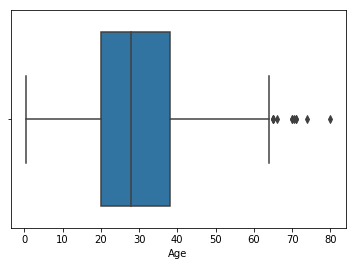

In [37]:
sns.boxplot(titanic.Age)

A interpretação do gráfico é:
- Exibe os percentis 25, 50, 75 em um retangulo que é chamado de IQR (Amplitude Interquartílica): Q3 - Q1
- A whisker inferior (limite inferior) é o percentil 25 (quartil 1) menos 1.5 multiplicado pelo IQR ($LI = Q1 - 1.5 * IQR$)
- A whisker superior (limite superior) é o percentil 75 (quartil 3) mais 1.5 multiplicado pelo IQR ($LS = Q3 + 1.5 * IQR$)
- Os pontos chamados de **outliers** (atípicos)

In [38]:
iqr = titanic.Age.quantile(0.75) - titanic.Age.quantile(0.25)
ls = titanic.Age.quantile(0.75) + 1.5 * iqr
ls

64.8125

In [39]:
titanic.Age.quantile(0.25) - 1.5 * iqr

-6.6875

In [40]:
titanic.Age.median()

28.0

![alt text](https://upload.wikimedia.org/wikipedia/commons/4/46/Diagrama_de_caixa2.png)

### "O grande valor de uma imagem é quando ela nos obriga a notar o que nunca esperávamos ver." - Tukey

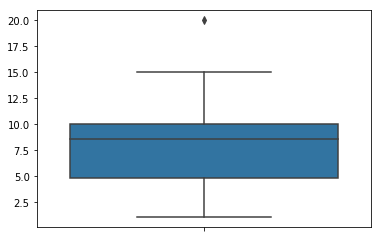

In [41]:
lista = [1,2,3,4,5,6,7,8,9,10,10,10,10,10,15,20]
sns.boxplot(lista, orient="v")

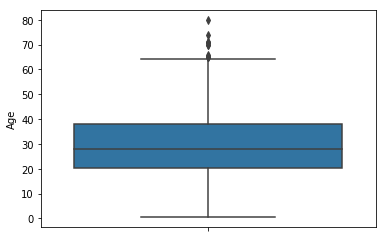

In [42]:
sns.boxplot(titanic.Age, orient="v")

## <font color='blue'>Crie um BoxPlot com o resultado do simulador de jogadas! Faça :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

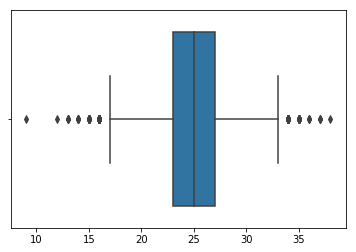

In [43]:
sns.boxplot(simulador)

## SwarmPlot - Ele serve para monstrar a incidência de valores 

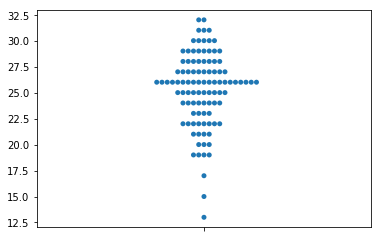

In [44]:
sns.swarmplot(simulador[:100], orient="v")

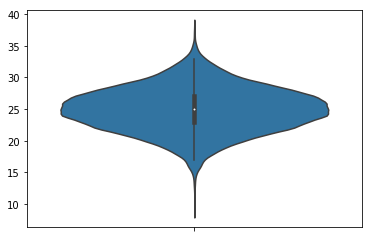

In [45]:
sns.violinplot(simulador, orient="v")

### Vamos colocar um em cima do outro agora

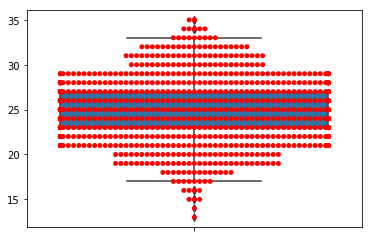

In [46]:
sns.swarmplot(simulador[:1000], orient="v", color="red")
sns.boxplot(simulador[:1000], orient="v")

### Nós também podemos gerar vários boxplots de uma só vez

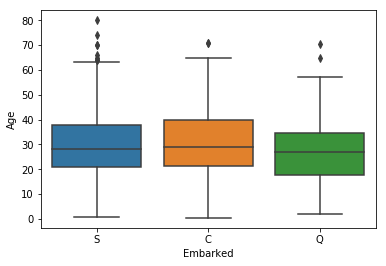

In [47]:
sns.boxplot(x=titanic.Embarked, y=titanic.Age)

-----------
### Antes de voltarmos vamos aprender mais um gráfico legal :)


## Gráfico de dispersão (scatter plot)
Gráfico de Dispersão são utilizados para pontuar dados em um eixo vertical e horizontal com a intenção de exibir quanto uma variável é afetada por outra.
O gráfico de dispersão utiliza coordenadas cartesianas para exibir valores de um conjunto de dados.

O scatter plot usando seaborn pode ser feito de várisa formas. O **LMPLOT** junta o scatter plot tradicional com as retas de medição de uma regressão linear

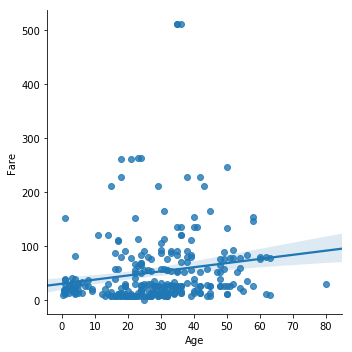

In [48]:
dados_com_vivos = titanic[titanic.Survived==1]
sns.lmplot(x="Age", y="Fare", data=dados_com_vivos, fit_reg=True)

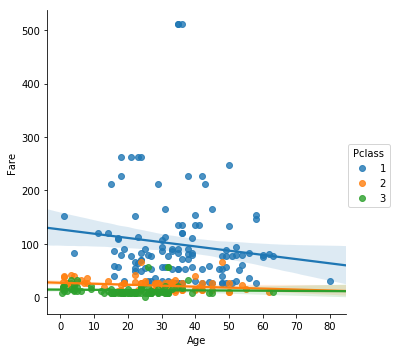

In [49]:
sns.lmplot(data=dados_com_vivos, x="Age", 
           y="Fare", hue='Pclass', fit_reg=True)

#### O lmplot permite gerar gráficos separados por colunas
#### Vamos gerar um gráfico para quem sobreviveu e outro para não

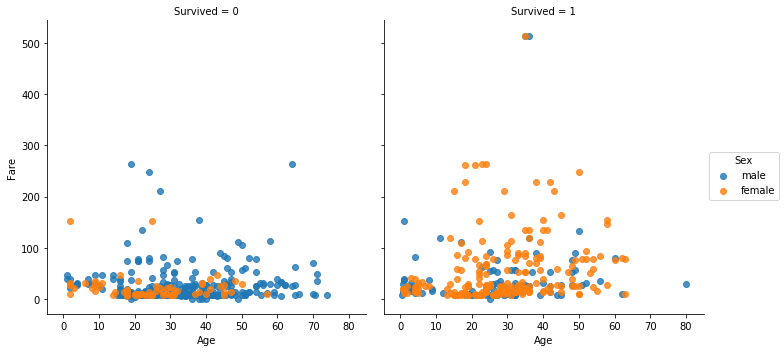

In [50]:
sns.lmplot(data=titanic, x="Age", y="Fare",
           hue='Sex', col="Survived", fit_reg=False)

---------
## Métricas
## Moda

É o valor da distribuição que ocorre com a maior frequência, ou seja, o valor que mais se repete dentro de uma série de observações. 

![alt text](http://www.statisticshowto.com/wp-content/uploads/2013/09/histogram.gif)

In [51]:
#a moda retorna uma lista pois podemos ter mais um de um elemento no top
titanic.Age.mode() 

0    24.0
dtype: float64

#### Para pegarmos uma moda só podemos pegar a primeira

In [52]:
titanic.Age.mode()[0]

24.0

In [53]:
titanic.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

## Com essas informações (Média, Mediana e Moda) vemos a assimetria de uma distribuição

![alt text](http://www.durofy.com/wp-content/uploads/2013/07/mode3.png)

Se **Média < Mediana < Moda**, tem a calda tendendo a esquerda (negativa)

Se **Média == Mediana == Moda**, então a distribuição é aproximadamente simétrica (ou também conhecida como normal)

Se **Média > Mediana > Moda**, tem a calda tendendo a direita (positiva)

## <font color='blue'>Faça uma função que retorne a assimetria de qualquer coluna (Serie) :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [54]:
def assimetria(coluna):
    moda = coluna.mode()[0]
    media = coluna.mean()
    mediana = coluna.median()
    if (media < mediana < moda):
        return("negativo")
    elif (media > mediana > moda):
        return("positivo")
    elif (media == mediana == moda):
        return("simetrico")
    else:
        return("assimetrico")

In [55]:
assimetria(titanic.Age)

'positivo'

In [56]:
moda = titanic.Age.mode()
media = titanic.Age.mean()
mediana = titanic.Age.median()

print("moda:", moda[0]) 
print("mediana:", mediana)
print("media:", media)

moda: 24.0
mediana: 28.0
media: 29.6991176471


---------------
## Medidas de dispersão

## Amplitude ou Range

É a diferença entre o maior e o menor valor do conjunto de dados.

![alt text](http://www.portalaction.com.br/sites/default/files/resize/EstatisticaBasica/figuras/ebe2.2-650x132.png)

In [57]:
exemplo = [10, 11, 12, 14, 15, 20, 30, 40, 45, 50]

menor = min(exemplo)
maior = max(exemplo)
print("amplitude", maior-menor)

amplitude 40


In [58]:
titanic.Age.max() - titanic.Age.min()

79.579999999999998

## Variância
É uma medida de dispersão quadratica que mostra o quão distante cada valor desse conjunto está do valor central.

O cálculo da variância populacional é obtido através da soma dos quadrados da diferença entre cada valor e a média aritmética, dividida pela quantidade de elementos observados. 

![alt text](https://www.wikihow.com/images/thumb/a/a7/Calculate-Variance-Step-10.jpg/aid867321-v4-728px-Calculate-Variance-Step-10.jpg)

### Como podemos tirar no GREGO e colocar em código?

In [59]:
def variancia(lista):
    n = len(lista)
    mu = np.mean(lista)
    numerador = 0
    for i in lista:
        numerador = numerador + (i - mu)**2
    return numerador/n

variancia([10,9,11,12,8])

2.0

![alt text](https://i.imgur.com/6y9Vnsw.png)

** Quanto menor é a variância, mais próximos os valores estão da média. **
![alt text](https://swh-826d.kxcdn.com/wp-content/uploads/2010/10/bell_curve_normal-curve.gif)

In [60]:
titanic.Age.var()

211.01912474630802

In [61]:
lista_de_exemplo = [1, 1000000000, 50000]
np.var(lista_de_exemplo)

2.2221111144443338e+17

## Desvio Padrão - stddev

O desvio padrão é capaz de identificar o “erro” em um conjunto de dados, caso quiséssemos substituir um dos valores coletados pela média aritmética.

**desvio_padrao = √variancia**

![alt text](http://www.statisticshowto.com/wp-content/uploads/2012/11/standard-deviation-examples1.png)

In [62]:
titanic.Age.std()

14.526497332334042

In [63]:
lista_de_exemplo = [1, 1]
np.std(lista_de_exemplo)

0.0

Podemos ver a utilização do desvio padrão na apresentação da média aritmética, informando o quão “confiável” é esse valor.

**média aritmética (x) ± desvio padrão (dp)**

**25 ± 3.53** 

-------------
# Vamos falar um pouco sobre AMOSTRA ...

## Inferência estatística
É um conjunto de técnicas que visam estudar uma população através de evidências fornecidas por uma amostra (sample)

## Como selecionar/extrair uma amostra?

In [64]:
import pandas
jogadas = pandas.read_csv("http://bit.ly/2AHxAkX") # amostras de 50 jogadas de moedas
jogadas[:3]

,exp
0,24
1,25
2,28


### O que costumo fazer é olhar a distribuíção!

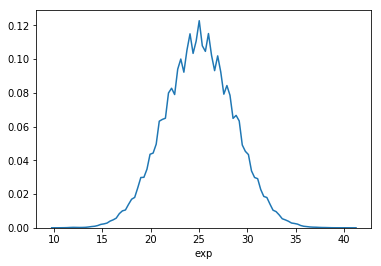

In [65]:
%matplotlib inline

experimentos = jogadas.exp
sns.distplot(experimentos, hist=False)

In [66]:
assimetria(jogadas.exp)

'assimetrico'

### O pandas nos entrega uma função de amostra (sample) nela podemos passar a fração da distribuição

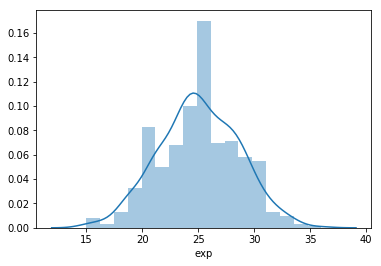

In [67]:
amostra = experimentos.sample(frac=0.01)
sns.distplot(amostra, hist=True)

In [68]:
assimetria(amostra)

'positivo'

In [69]:
np.std(amostra)

3.5651978907207944

### Uma coisa que sempre vejo é se as curvas estão parecidas

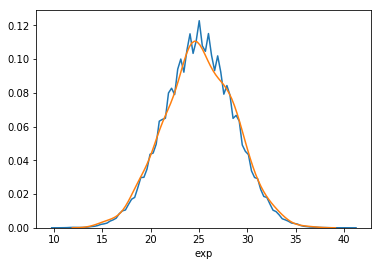

In [70]:
sns.distplot(experimentos, hist=False)
sns.distplot(amostra, hist=False)

### Outra forma é ver as médias dos dados

In [71]:
print(experimentos.mean())
print(amostra.mean())

25.0216
25.058


### Junto com o desvio padrão a gente consegue ver se os erros continuam iguais

In [72]:
print(experimentos.std())
print(amostra.std())

3.53677022365
3.56876844534


## Validando a amostra: Intervalo de Confiança + Margem de erro (a largura entre a média e os valores do intervalo)

O nível de confiança é a frequência com a qual o intervalo observado contém o parâmetro real de interesse quando o experimento é repetido várias vezes. 
Os intervalos de confiança são tipicamente estabelecidos no nível de confiança de 95%.

In [73]:
from scipy import stats

mu = np.mean(jogadas.exp)
sigma = np.std(jogadas.exp)

print(mu)
print(sigma)
 
#A location (loc) é uma média.
#A escala (scale) é o desvio padrão.
 
stats.norm.interval(0.95,loc=mu,scale=sigma)
#95% dos valores estão nesse range

25.0216
3.53673485577


(18.089727059828448, 31.953472940171551)

<br>
### Margem de erro não é mágica!

In [74]:
print("limite inferior = {}".format(mu - 1.96 * sigma))
print("limite superior = {}".format(mu + 1.96 * sigma))
# https://www.google.com.br/url?sa=i&rct=j&q=&esrc=s&source=images&cd=&ved=2ahUKEwi_kr2G44jdAhUGFJAKHQq0BYcQjRx6BAgBEAU&url=https%3A%2F%2Fslideplayer.com%2Fslide%2F8338113%2F&psig=AOvVaw0px7SXn0maa92kUKr1gLzk&ust=1535306074298591

limite inferior = 18.089599682695912
limite superior = 31.953600317304087


<br>
## Teste de Hipótese para comparação entre amostras

O teste t de Student ou somente teste t é um teste de hipótese que usa conceitos estatísticos para rejeitar ou não uma hipótese nula quando a estatística de teste segue uma distribuição t de Student. Essa premissa é normalmente usada quando a estatística de teste, na verdade, segue uma distribuição normal, mas a variância da população sigma-quadratica é desconhecida.

In [75]:
stats.ttest_ind?

In [76]:
amostra1 = jogadas.exp.sample(frac=0.1)
amostra2 = jogadas.exp.sample(frac=0.4)

In [77]:
s, pvalue = stats.ttest_ind(amostra1, amostra2)

In [78]:
s, pvalue

(0.41544066292386178, 0.67782291023830155)

In [79]:
amostra1 = jogadas.exp.sample(frac=0.1)
amostra2 = jogadas.exp.sample(frac=0.4)

s, pvalue = stats.ttest_ind(amostra1, amostra2)

if(pvalue >= 0.01):
    print("Aceito que as médias são iguais estatisticamente com 99% de confianca!")
    print(amostra1.mean(), amostra2.mean())
else:
    print("Rejeito que as médias são iguais estatisticamente com 99% de confianca!")
    print(amostra1.mean(), amostra2.mean())

Aceito que as médias são iguais estatisticamente com 99% de confianca!
25.046 25.01725


In [80]:
amostra1 = jogadas.exp.sample(frac=0.1)
amostra2 = jogadas.exp.sample(frac=0.4)

statistic, pvalue = stats.ttest_ind(amostra1, amostra2)

print(stats.ttest_ind(amostra1, amostra2))
print(statistic)
print(pvalue)


Ttest_indResult(statistic=-0.67395841687688718, pvalue=0.50034398270184477)
-0.673958416877
0.500343982702


______________
## Distribuições

## Distribuição Normal

A distribuição normal tem como caracteristica o formato de sino e se imaginarmos uma reta no meio do gráfico (mediana) os dados estão igualmente distribuídos (simetrico ao centro).

Nós vemos amostras nessa distribuíção em diversos casos: altura das pessoas, aferição de pressão sanguínea, salarios, resultados de testes de QI, etc..

![alt text](http://www.mathsisfun.com/data/images/normal-distrubution-large.svg)

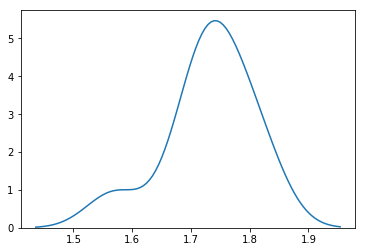

In [81]:
alturas = [1.73, 1.7, 1.81, 1.74, 1.7, 1.75, 1.76, 1.82, 1.57]
sns.distplot(alturas, hist=False)

In [82]:
assimetria(pandas.Series(alturas))

'assimetrico'

### Como verificar se uma distribuição é normal?

Esta função testa a hipótese nula de que uma amostra vem
de uma distribuição normal. É baseado em Teste de D'Agostino e Pearson 
que combina inclinação e curtose a produzir um teste global de normalidade.

In [83]:
stats.normaltest?

In [84]:
z, pvalue = stats.normaltest(amostra1)
if(pvalue >= 0.05):
    print("Distribuição é Normal", pvalue)
else:
    print("Não é uma distribuição normal", pvalue)

Distribuição é Normal 0.476503114124


## <font color='blue'>Verifique se são normais as distribuições de jogadas e de idade no titanic :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [85]:
def verificador_de_normal(lista):
    z, pvalue = stats.normaltest(lista)
    if(pvalue >= 0.05):
        print("Distribuição é Normal", pvalue)
    else:
        print("Não é uma distribuição normal", pvalue)

In [86]:
verificador_de_normal(jogadas.exp)

Distribuição é Normal 0.0573305970345


In [87]:
verificador_de_normal(titanic.Age.dropna())

Não é uma distribuição normal 0.000117095996574


In [88]:
type(list(titanic.Age))

list

### Mas eu queria tanto que ele fosse uma normal :(

![alt text](https://mathcoachblog.files.wordpress.com/2014/10/paranormal.jpg)

## Temos uma mágica! Teorema do Limite Central
Esse teorema prova que um conjunto das médias de uma amostra do seu dado original gera uma distribuição normal representativa

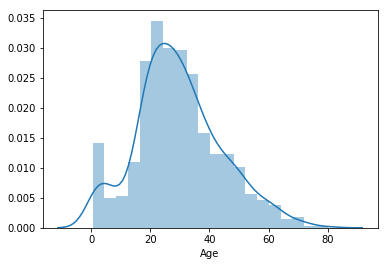

In [89]:
sns.distplot(titanic.Age.dropna())

In [90]:
np.mean(titanic.Age)

29.69911764705882

## <font color='blue'>Agora que vocês sabem a fórmula, que tal tentar fazer :)</font>

### Dica: Um conjunto das médias de uma amostra do seu dado original gera uma distribuição normal
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [91]:
def is_normal(lista):
    z, pvalue = stats.normaltest(lista)
    if(pvalue <= 0.5):
        return True
    return False

21


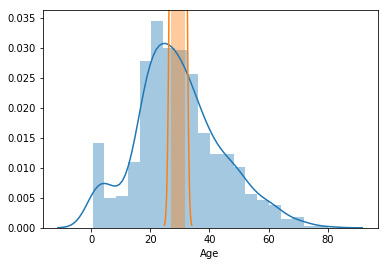

In [92]:
media_das_amostras = []
for n in range(0,1000):
    amostra = titanic.Age.sample(frac=0.1)
    media = amostra.mean()
    media_das_amostras.append(media)
    if (n > 20) and is_normal(media_das_amostras):
        print(n)
        break

sns.distplot(titanic.Age.dropna(), hist=True)
sns.distplot(media_das_amostras, hist=True)

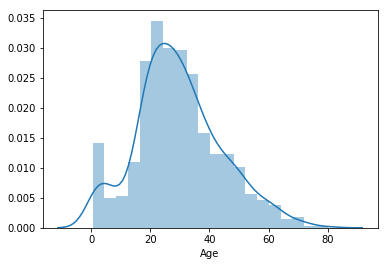

In [93]:
sns.distplot(titanic.Age.dropna(), hist=True)

In [94]:
verificador_de_normal(media_das_amostras)

Distribuição é Normal 0.446889909734


### Distribuição exponencial

A distribuição exponencial é uma distribuição muito utilizada na prática para modelar tempo de falha de objetos. Por exemplo, pode ser usada para modelar o tempo que demora até uma lâmpada falhar. Ela possui um parâmetro, que pode ser interpretado da seguinte forma: é o tempo de vida médio do objeto.
Ela sofre de perda de memória!

Exemplo:

Tempo de ligação em um callcenter: 
Quanto tempo 100 pessoas ficaram em uma ligação com um callcenter ?

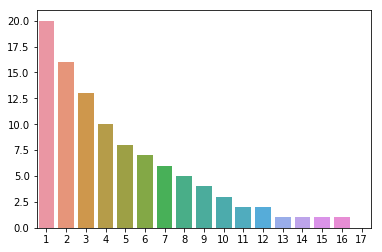

In [95]:
qnt_pessoas = [20,16,13,10,8,7,6,5,4,3,2,2,1,1,1,1,0]
tempo_de_ligacao = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

sns.barplot(tempo_de_ligacao,qnt_pessoas)